In [1]:
import numpy as np
import pandas as pd
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
genes = ['gene' + str(i) for i in range(1,101)]

In [4]:
wt = ['wt' + str(i) for i in range(1,6 )]

In [6]:
ko = ['ko' + str(i) for i in range(1,6 )]

<p> without stars i.e [*wt, *ko] we would crfeate an array of two array and that wouldn't create 12 columns like we want </p>

In [7]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

<p> This is where we finally create the random data.
    For each gene in the index (i.e. gene1, gene2, ...gene100), we create 5 values for the "wt" samples and 5 values for the "ko" samples. </p>

In [9]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [10]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,126,131,142,136,168,657,586,654,636,698
gene2,49,51,55,54,56,334,324,348,322,345
gene3,301,325,293,307,317,667,667,676,675,696
gene4,642,629,600,611,624,544,531,487,561,508
gene5,940,886,899,953,907,537,605,591,580,570


In [11]:
data.shape

(100, 10)

In [12]:
scaled_data = preprocessing.scale(data.T)

In [13]:
pca = PCA()

In [14]:
pca.fit(scaled_data)

PCA()

In [15]:
pca_data = pca.transform(scaled_data)

In [17]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

In [20]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

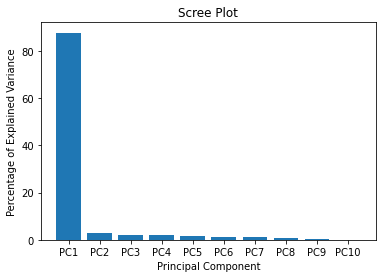

In [21]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()